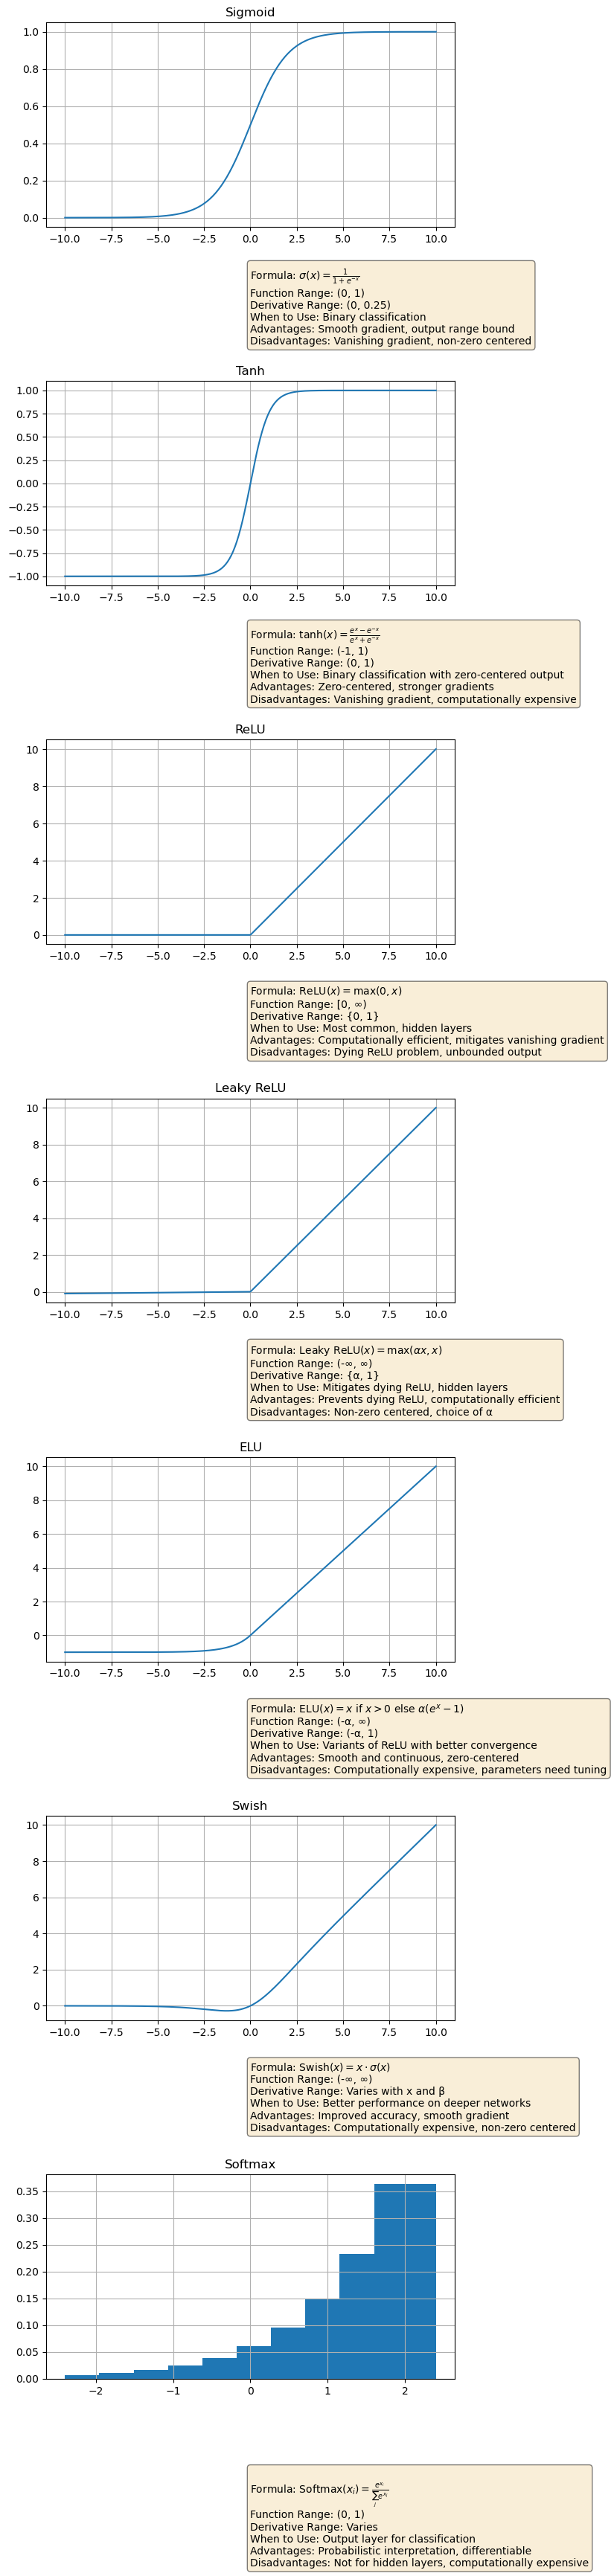

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x, beta=1.0):
    return x * sigmoid(beta * x)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Generate input data
x = np.linspace(-10, 10, 400)

# Apply activation functions
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_leaky_relu = leaky_relu(x)
y_elu = elu(x)
y_swish = swish(x)

# Create plots
fig, axs = plt.subplots(7, 1, figsize=(8, 35))

# Define function to plot each activation function with details
def plot_activation(ax, x, y, name, formula, func_range, deriv_range, when_to_use, advantages, disadvantages):
    ax.plot(x, y, label=name)
    ax.set_title(name)
    ax.grid(True)
    ax.text(0.5, -0.2, f"Formula: {formula}\nFunction Range: {func_range}\nDerivative Range: {deriv_range}\nWhen to Use: {when_to_use}\nAdvantages: {advantages}\nDisadvantages: {disadvantages}", 
            transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot each activation function
plot_activation(axs[0], x, y_sigmoid, "Sigmoid", r"$\sigma(x) = \frac{1}{1 + e^{-x}}$", "(0, 1)", "(0, 0.25)", "Binary classification", 
                "Smooth gradient, output range bound", "Vanishing gradient, non-zero centered")

plot_activation(axs[1], x, y_tanh, "Tanh", r"$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$", "(-1, 1)", "(0, 1)", "Binary classification with zero-centered output", 
                "Zero-centered, stronger gradients", "Vanishing gradient, computationally expensive")

plot_activation(axs[2], x, y_relu, "ReLU", r"$\text{ReLU}(x) = \max(0, x)$", "[0, ∞)", "{0, 1}", "Most common, hidden layers", 
                "Computationally efficient, mitigates vanishing gradient", "Dying ReLU problem, unbounded output")

plot_activation(axs[3], x, y_leaky_relu, "Leaky ReLU", r"$\text{Leaky ReLU}(x) = \max(\alpha x, x)$", "(-∞, ∞)", "{α, 1}", "Mitigates dying ReLU, hidden layers", 
                "Prevents dying ReLU, computationally efficient", "Non-zero centered, choice of α")

plot_activation(axs[4], x, y_elu, "ELU", r"$\text{ELU}(x) = x \text{ if } x > 0 \text{ else } \alpha(e^x - 1)$", "(-α, ∞)", "(-α, 1)", "Variants of ReLU with better convergence", 
                "Smooth and continuous, zero-centered", "Computationally expensive, parameters need tuning")

plot_activation(axs[5], x, y_swish, "Swish", r"$\text{Swish}(x) = x \cdot \sigma(x)$", "(-∞, ∞)", "Varies with x and β", "Better performance on deeper networks", 
                "Improved accuracy, smooth gradient", "Computationally expensive, non-zero centered")

# For Softmax, we need a different x range since it works on vectors
x_softmax = np.linspace(-2, 2, 10)
y_softmax = softmax(x_softmax)
axs[6].bar(x_softmax, y_softmax, label='Softmax')
axs[6].set_title('Softmax')
axs[6].grid(True)
axs[6].text(0.5, -0.5, f"Formula: $\\text{{Softmax}}(x_i) = \\frac{{e^{{x_i}}}}{{\\sum_{{j}} e^{{x_j}}}}$\nFunction Range: (0, 1)\nDerivative Range: Varies\nWhen to Use: Output layer for classification\nAdvantages: Probabilistic interpretation, differentiable\nDisadvantages: Not for hidden layers, computationally expensive", 
            transform=axs[6].transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Adjust layout
plt.tight_layout()
plt.show()

# Vanishing Gradient:
When gradients are too small, the weights update very slowly, causing the training process to become inefficient or even stall, especially in deep networks.
This issue hinders the network's ability to learn and represent complex patterns over multiple layers.

# Non-Zero Centered:
Non-zero centered activations, like the sigmoid function, produce outputs that are always positive, leading to imbalanced gradient updates.
This can cause the gradient descent to oscillate inefficiently, slowing down the convergence during training.
# Dying ReLU:
ReLU neurons can "die" during training, meaning they output zero for any input and stop learning, resulting in a loss of model capacity.
This occurs when the input to the ReLU is always negative, causing the gradient to be zero and effectively making the neuron inactive.

# Unbounded Output:
Activations with unbounded outputs, like ReLU, can produce very large values, which may lead to numerical instability and exploding gradients.
This can make the training process unpredictable and require careful tuning of the learning rate.

# Computationally Expensive:
Functions that require more complex computations, like Tanh or Swish, slow down the training process due to increased computational overhead.
This can become significant when training large models or when the computational resources are limited.